In [29]:
import numpy as np 
import math 
import pandas as pd 
pd.set_option('display.float_format',lambda x:'%.3f' % x)

import matplotlib.pyplot as plt 
#plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
import seaborn as sns 
sns.set_palette('muted')
sns.set_style('dark')
sns.set(font='SimHei')
import warnings
warnings.filterwarnings('ignore')
path = 'C:/test/work/ppd/data'

In [5]:
# 导入 data_input 处理好的数据
df1 = pd.read_csv(path+'/data_input1.csv',encoding='gb18030')

In [6]:
df1.shape

(49999, 229)

In [7]:
# 样本的好坏比
df1.target.value_counts()

0.000    46281
1.000     3718
Name: target, dtype: int64

## 借款成交量的时间趋势变化 

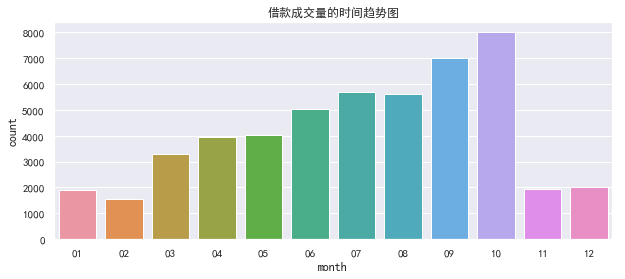

In [30]:
# 借款成交时间的范围
import datetime as dt
df1['ListingInfo'] = pd.to_datetime(df1.ListingInfo)

# 每个月份的用户数分布
df1['month'] = df1.ListingInfo.dt.strftime('%m')
# 绘制成交量的时间趋势图
plt.figure(figsize=(10,4))
plt.title('借款成交量的时间趋势图')
sns.countplot(data=df1.sort_values('month'),x='month')
plt.show()

In [36]:
df1['month'].value_counts()

10    7992
09    6985
07    5666
08    5598
06    5021
05    4041
04    3967
03    3288
12    2033
11    1934
01    1900
02    1574
Name: month, dtype: int64

## 违约情况的时间趋势分析 

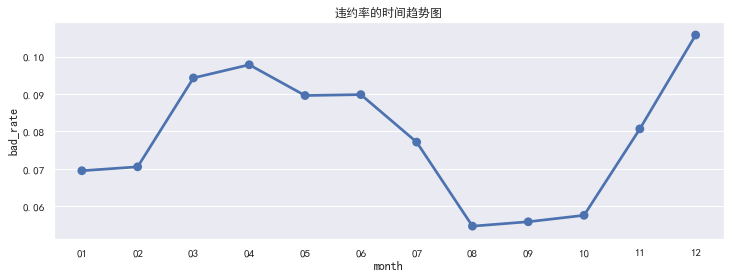

In [31]:
month_group = df1.groupby('month') # 根据月份计算每个月的违约率
time_bad_trend = pd.DataFrame()
time_bad_trend['total'] = month_group.target.count()
time_bad_trend['bad'] = month_group.target.sum()
time_bad_trend['bad_rate']=time_bad_trend['bad']/time_bad_trend['total']
time_bad_trend = time_bad_trend.reset_index()
plt.figure(figsize=(12,4))
plt.title('违约率的时间趋势图')
sns.pointplot(data=time_bad_trend,x='month',y='bad_rate',linestyles='-')
plt.show()

## 数据清洗 

In [37]:
# 检查数值型变量的缺失
data1 = df1.drop(['ListingInfo','month'],axis=1)

In [50]:
# 删除缺失率在80%以上的变量
null = data1.isna()
null_feature = null.sum()/data1.shape[0]
index = null_feature[null_feature>0.8].index

In [43]:
data2 = data1.drop(index, axis=1)

In [60]:
null_number=null.sum(axis=1)
# 删除变量缺失个数在10个以上的用户
number_index=null_number[null_number>10].index
data3 = data2.drop(number_index)

In [59]:
null_number.describe(percentiles=[0.99])

count   49999.000
mean        4.773
std         3.185
min         0.000
50%         5.000
99%        12.000
max        39.000
dtype: float64

In [63]:
numerical = data3.select_dtypes(exclude='O')
numerical.shape

(49101, 206)

In [65]:
category = data3.select_dtypes(include='O')
category.shape

(49101, 20)

In [88]:
del_cat=[]
for each in category.columns:
    x = category[each].value_counts().sort_values(ascending=False)
    if x[0]/len(category) > 0.9:
        del_cat.append(each)

In [89]:
del_num = []
for each in numerical.columns:
    x = numerical[each].value_counts().sort_values(ascending=False)
    if x.iloc[0]/len(numerical) > 0.9:
        del_num.append(each)

In [90]:
del_cat.extend(del_num)
del_cat.remove('target')

In [92]:
'''在建模之前处理的数据里面，如果特征都是单一值，
我们应该删除。这样的值没有意义，没有区分能力。'''
data4 = data3.drop(del_cat,axis=1)
data4.shape

(49101, 149)

In [93]:
# 保存数据至本地
data4.to_csv(path+'/data1_clean.csv',encoding='gb18030',index=False)